# Plots for differentiation and thermal evolution<a class="anchor" id="top"></a>
For the whole thermal evolution:
+ [temperature](#temp)
+ [% silicate melted](#silicate)
+ [Rayleigh number](#critical-rayleigh)


For differentiation stage:
+ [% iron melted](#iron)

For the thermal evolution stage:
+ [temperatures and heat fluxes](#temp-heat)
+ [inner core size and magnetic Reynolds number](#Rem)

## Set-up

In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#scale time to Myr
from parameters import Myr, Tms, Tml, Xs_0 #need to change so import from save file instead

Choose run and whether you want to save figure

In [2]:
run=1
save = False # do you want to save your figures?
conduction = False #does the mantle switch to conduction

Load npz files for differentiation

In [3]:
npzfile = np.load(f'Results_combined/run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
iron = npzfile['Xfe']
silicate_d = npzfile['Xsi']
tdiff = npzfile['t_diff']
Ra_d = npzfile['Ra']
Ra_crit_d = npzfile['Ra_crit']

Load npz files for thermal evolution

In [4]:
npzfile = np.load('Results_combined/run_{}.npz'.format(run))
Tc= npzfile['Tc'] 
Tc_conv = npzfile['Tc_conv']
Tcmb = npzfile['Tcmb']
Tm_mid = npzfile['Tm_mid']
Tm_conv = npzfile['Tm_conv']
Tm_surf = npzfile['Tm_surf'] 
T_profile = npzfile['T_profile']
f = npzfile['f'] 

t = npzfile['t'] #time in s
Rem1 = npzfile['Rem1'] # magnetic Reynolds number from compositional (Nimmo) and thermal convection (whatever is larger at each time step)
Rem2 = npzfile['Rem2'] # magnetic Reynolds number from compositional (Nichols) and thermal convection (whatever is larger at each time step)
Flux = npzfile['Flux']
Ra = npzfile['Ra'] 
RaH = npzfile['RaH'] 
RanoH = npzfile['RanoH'] 
Racrit = npzfile['Racrit'] 
d0 = npzfile['d0'] 
min_unstable = npzfile['min_unstable'] 
Xs = npzfile['Xs']
dl = npzfile['dl']
dx = npzfile['dc']
Fs = Flux[0]
Fcmb = Flux[1]
Fad = Flux[2]
Frad = Flux[3]

Run Info

In [5]:
run_info = pd.read_csv('run_info4.csv',delimiter=',')

row = run_info[run_info['run']==run]
#use -1 so always read most recently written row tih that run number
r = row.iloc[-1,1] #radius [m]
Tm0 = row.iloc[-1,2] # initial mantle and core temp [K]
tstart = row.iloc[-1,3]
tend = row.iloc[-1,4] # max possible time of simulation [Myr]
tstep = row.iloc[-1,5] #max timestep [Myr]
tsolid = row.iloc[-1,6] #time at which solidifcation finishes [Myr] if tsolid == tend then core may not have finished solidifying
cond_i= row.iloc[-1,7] #index in array at which mantle started conducting
if conduction == True:
    cond_i = int(cond_i)
    cond_t = t[cond_i]/Myr #time at which mantle switched to conduction
    
dr=row.iloc[-1,9] #cell spacing
dt =row.iloc[-1,10] #T_profile output frequency
viscosity = row.iloc[-1,11] #viscosity profile

Calculate silicate melt content for thermal evolution

In [6]:
nmantle = int((r/dr)/2)
silicate_t = (T_profile[:,nmantle:] - Tms)/(Tml-Tms)

Concatenate shared variables

In [7]:
Tall = np.hstack((Tdiff,np.transpose(T_profile)))
tall = np.append(tdiff,t)
iron_all = np.hstack
Ra_all = np.append(Ra_d,Ra)
Ra_crit_all = np.append(Ra_crit_d,Racrit)

Scale time, choose whether or not to plot logarithmically

In [8]:
t_plot_all = tall/Myr
t_plot_t = t/Myr
log_time = True # do you want to plot time logarithmically
#dt = 1 #for now plot everything in units of timestep

## Temperature <a class="anchor" id="temp"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [9]:
import matplotlib.colors as mcolors

In [10]:
rplot = np.arange(0,r,dr)/1e3

In [11]:
r_unstable=np.array([]) 
for ind in min_unstable:
    r_unstable = np.append(r_unstable,rplot[int(ind)])
rc = r/2

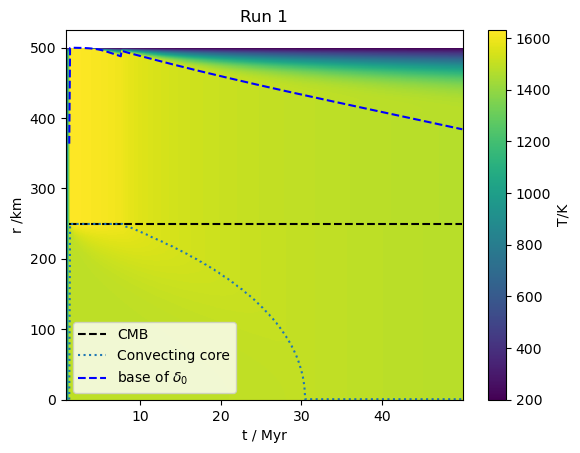

In [12]:
plt.figure()
plt.pcolormesh(t_plot_all,rplot,Tall,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
plt.hlines(rc/1e3,min(t/Myr),max(tall/Myr),linestyle='--',color='black',label='CMB')
plt.plot(t/Myr,r_unstable,linestyle='dotted',label='Convecting core')
if conduction == True:
    plt.plot(t[:cond_i]/Myr,(r-d0[:cond_i])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
else:
    plt.plot(t/Myr,(r-d0)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.colorbar(label='T/K')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'Plots/Tdiff_run{run}.png')

## Melted silicate content <a class="anchor" id="silicate"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

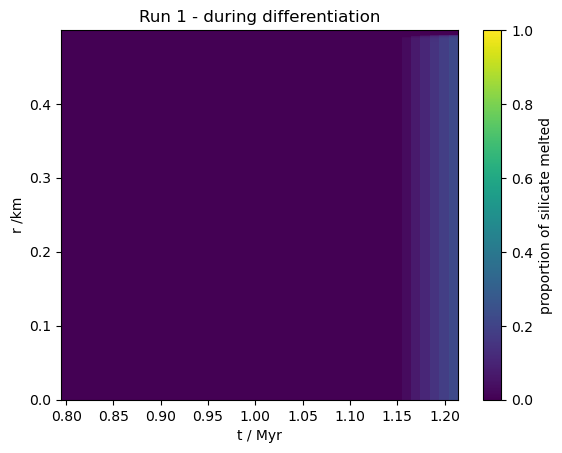

In [13]:
plt.figure()
plt.pcolormesh(tdiff/Myr, rplot/1e3,silicate_d,shading = 'nearest',vmin=0, vmax=1) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run} - during differentiation')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'Plots/si_diff_run_{run}.png')

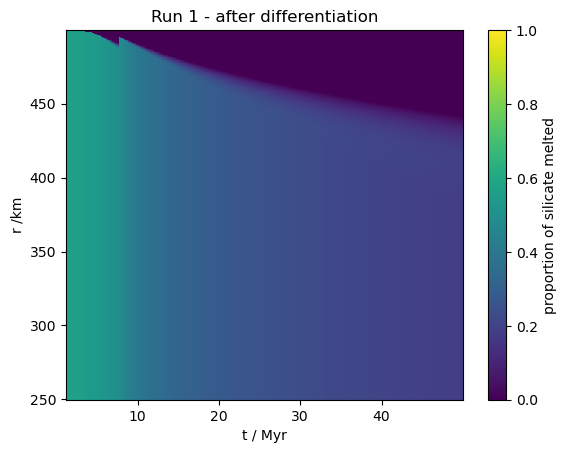

In [14]:
rmantle = np.arange(r/2,r,dr)/1e3
plt.figure()
plt.pcolormesh(t/Myr, rmantle,np.transpose(silicate_t),shading = 'nearest',vmin=0, vmax=1) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run} - after differentiation')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'Plots/si_diff_run_{run}.png')

## Rayleigh number<a class="anchor" id="critical-rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

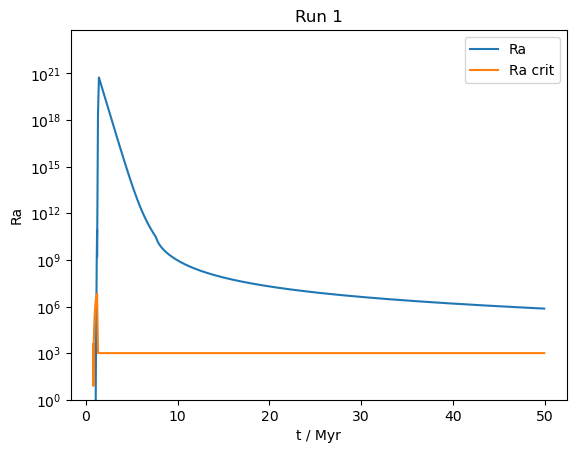

In [15]:
plt.figure()
plt.semilogy(t_plot_all,Ra_all,label='Ra')
plt.semilogy(t_plot_all,Ra_crit_all,label='Ra crit') #
plt.ylim(bottom=1e0)
plt.ylabel('Ra')
plt.xlabel('t / Myr')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'Plots/Racrit_diff_run{run}b.png')

## Melted iron content during differentiation<a class="anchor" id="iron"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

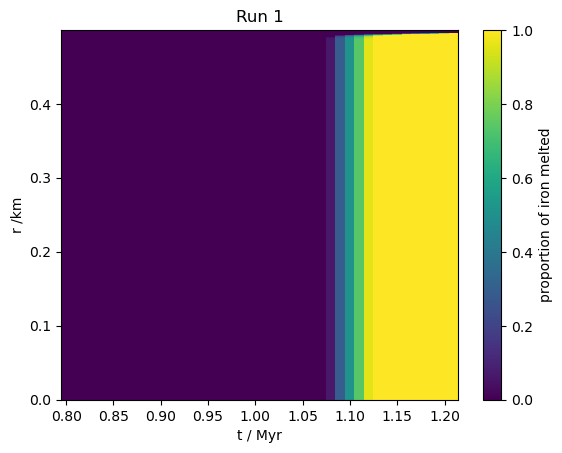

In [16]:
plt.figure()
plt.pcolormesh(tdiff/Myr, rplot/1e3,iron,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='proportion of iron melted')
if save ==True:
    plt.savefig(f'Plots/fe_diff_run_{run}.png')

## Temperature and Flux Plot <a class="anchor" id="temp-heat"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

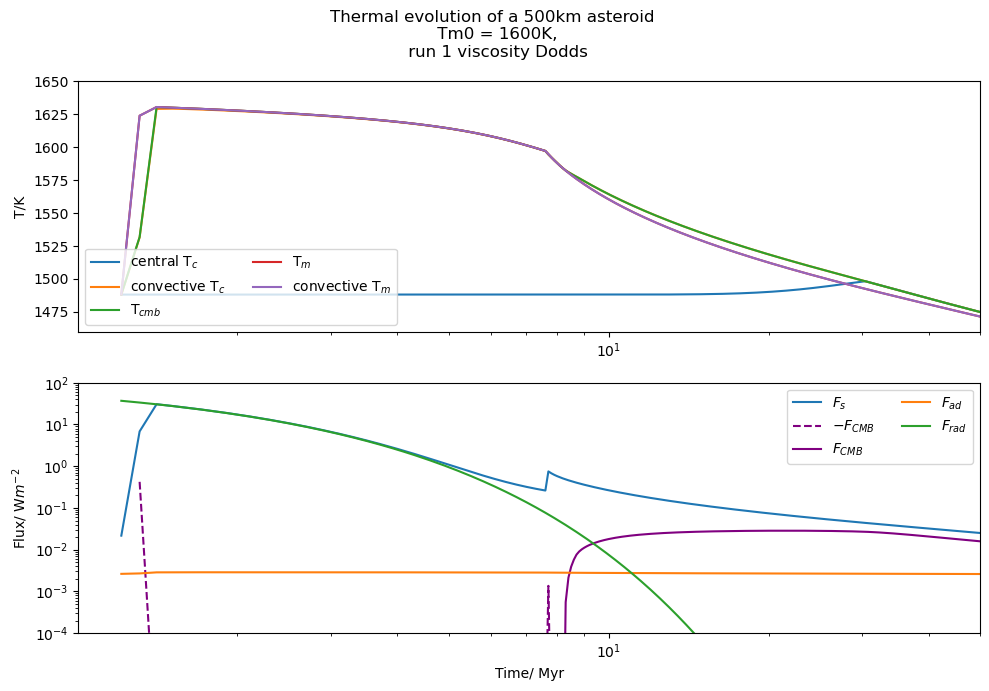

In [17]:
plt.figure(tight_layout=True,figsize=[10,7])
plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n Tm0 = {Tm0}K,\n run {run} viscosity {viscosity}')

xmin=tstart

#temperatures as function of time
plt.subplot(2,1,1)
if log_time == True:
    plt.semilogx(t_plot_t,Tc,label='central T$_c$')
    plt.semilogx(t_plot_t[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.semilogx(t_plot_t,Tcmb,label='T$_{cmb}$')
    plt.semilogx(t_plot_t,Tm_mid,label='T$_m$')
    plt.semilogx(t_plot_t[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    #plt.semilogx(t_plot_t,Tm_surf,label='T$_m$ - surface')
else:
    plt.plot(t_plot_t,Tc,label='central T$_c$')
    plt.plot(t_plot_t[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.plot(t_plot_t,Tcmb,label='T$_{cmb}$')
    plt.plot(t_plot_t,Tm_mid,label='T$_m$')
    plt.plot(t_plot_t[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    #plt.plot(t_plot_t,Tm_surf,label='T$_m$ - surface')
if conduction == True:
    plt.vlines(cond_t,ymin=min(Tm_surf),ymax=1600,color='black',linestyle='--',label='conduction')
plt.xlim(right=50)
plt.ylim([1460,1650]) #use these limits when comparing runs
plt.ylabel('T/K')
plt.legend(loc='lower left', ncol= 2)

#fluxes as function of time
plt.subplot(2,1,2)

Fcmb_neg = Fcmb[Fcmb<0]
Fcmb_pos = Fcmb[Fcmb>0]
if log_time == True:
    plt.loglog(t_plot_t,Fs,label='$F_s$')
    plt.loglog(t_plot_t[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',linestyle='dashed',color='purple')
    plt.loglog(t_plot_t[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='purple')
    plt.loglog(t_plot_t,Fad,label='$F_{ad}$')
    plt.loglog(t_plot_t,Frad,label='$F_{rad}$')
else:
    plt.semilogy(t_plot_t,Fs,label='$F_s$')
    plt.semilogy(t_plot_t[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',linestyle='dashed',color='purple')
    plt.semilogy(t_plot_t[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='purple')
    plt.semilogy(t_plot_t,Fad,label='$F_{ad}$')
    plt.semilogy(t_plot_t,Frad,label='$F_{rad}$')
plt.xlabel('Time/ Myr')

plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.xlim(right=50)
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)


if save == True:
    plt.savefig('Plots/run_{}_Tflux.png'.format(run),dpi=450)


## Magnetic Reynolds number and inner core size <a class="anchor" id="Rem"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

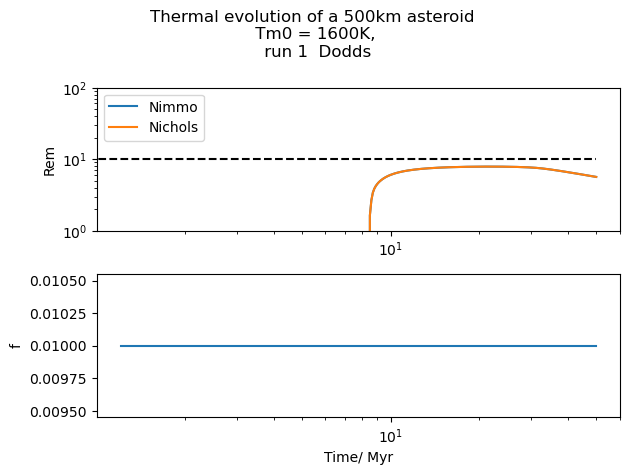

In [18]:
plt.figure(tight_layout=True)
plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n Tm0 = {Tm0}K, \n run {run}  {viscosity}')
plt.subplot(2,1,1)
plt.loglog(t_plot_t,Rem1,label='Nimmo')
plt.loglog(t_plot_t,Rem2,label='Nichols')
plt.hlines(10,xmin=0,xmax=t_plot_t[len(Rem1)-1],color='k',linestyle='--')
#plt.xlabel('Time/Myr')
plt.ylabel('Rem')
plt.legend(loc='upper left')
plt.ylim([1,100])

plt.subplot(2,1,2)
plt.semilogx(t_plot_t,f,label='f')
plt.xlabel('Time/ Myr')
plt.ylabel('f')

if save == True:
    plt.savefig('Plots/run_{}_Remf.png'.format(run),dpi=450)